# [E-05] Rock-Paper-Scissors

## 가위 바위 보 분류기
* Train Dataset 1200개 ( validation set 20%)
* Test Dataset 300개

# 1. import 파일

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Conv2D, Dropout

import numpy as np
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 2. Image File Resize

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
	
train_dir_path = './image/rock_scissor_paperpaper/train3'
test_dir_path = './image/rock_scissor_paperpaper/test'
    
image_dir_path =  train_dir_path+ '/scissor'
resize_images(image_dir_path)
image_dir_path =  train_dir_path + '/rock'
resize_images(image_dir_path)
image_dir_path =  train_dir_path + '/paper'
resize_images(image_dir_path)
print("Train 이미지 resize 완료!")


image_dir_path =  test_dir_path + '/scissor'
resize_images(image_dir_path)
image_dir_path =  test_dir_path + '/rock'
resize_images(image_dir_path)
image_dir_path =  test_dir_path + '/paper'
resize_images(image_dir_path)
print("Test 이미지 resize 완료!")

400  images to be resized.
400  images resized.
400  images to be resized.
400  images resized.
400  images to be resized.
400  images resized.
Train 이미지 resize 완료!
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
Test 이미지 resize 완료!


# 3. Train Data Load

In [3]:

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data(train_dir_path,1200)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_train_reshaped=x_train_norm.reshape( -1, 56, 56, 3) 
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
x_train shape: (1200, 56, 56, 3)
y_train shape: (1200,)


In [4]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


라벨:  0


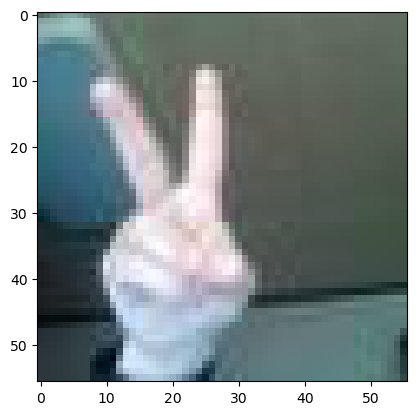

In [5]:
#MNIST DataSet 불러오기
plt.imshow(x_train[150])
print('라벨: ', y_train[150])

# 4. Model Layered & Compile & Fit

In [16]:

# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=32
n_channel_2=64
n_channel_3=128

n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
#model.add(keras.layers.Dropout(0.1))
#
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))
#
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hist = model.fit(x_train_reshaped, y_train, epochs=n_train_epoch, validation_split=0.2 , verbose=1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 128)       

# 5. train acc / train loss Visualization

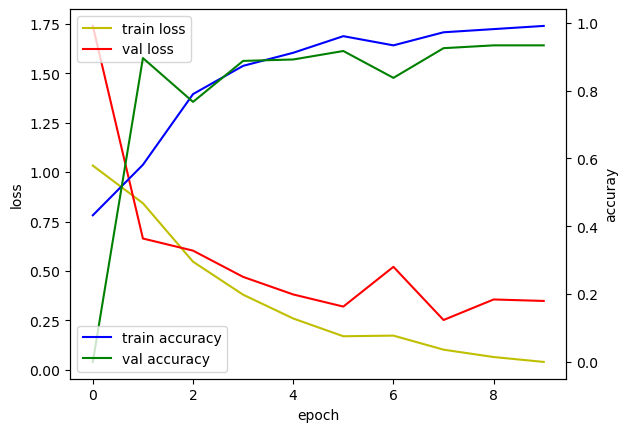

In [22]:

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')


acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuray')
acc_ax.legend(loc='lower left')
plt.show()



# 6. Test Data Load

In [8]:
image_dir_path ="./image/rock_scissor_paperpaper/test"
(x_test, y_test)=load_data(image_dir_path, 300)

x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped=x_test_norm.reshape( -1, 56, 56, 3) 


학습데이터(x_train)의 이미지 개수는 300 입니다.


라벨:  2


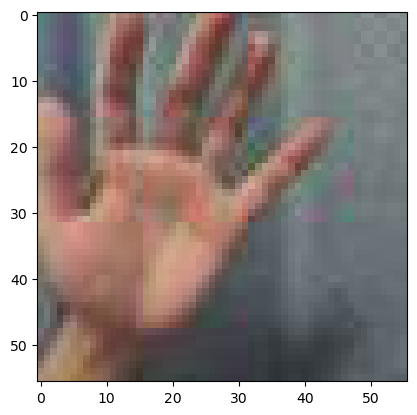

In [9]:
# 테스트 이미지 확인
plt.imshow(x_test_reshaped[255])
print('라벨: ', y_test[255])

# 7. 모델 평가

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)



10/10 - 0s - loss: 2.0437 - accuracy: 0.6067 - 97ms/epoch - 10ms/step


# 추론 오류건 조회

In [19]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 8ms/step
model.predict() 결과 :  [0.9234791  0.01390735 0.06261358]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


In [12]:
y_train.shape

(1200,)

예측확률분포: [1.7736704e-05 9.9961507e-01 3.6715277e-04]
라벨: 0, 예측결과: 1


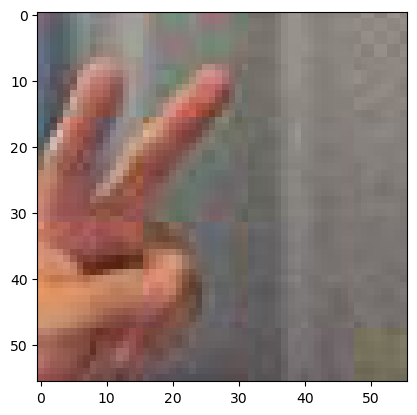

예측확률분포: [0.23860383 0.00098085 0.7604153 ]
라벨: 0, 예측결과: 2


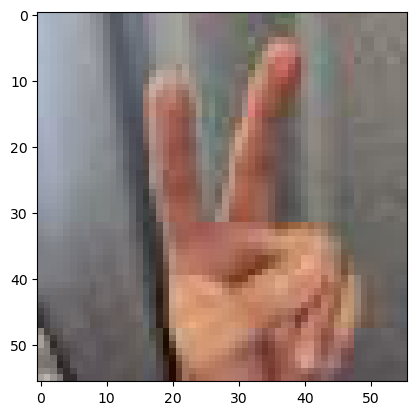

예측확률분포: [8.6265291e-06 9.9773562e-01 2.2556803e-03]
라벨: 2, 예측결과: 1


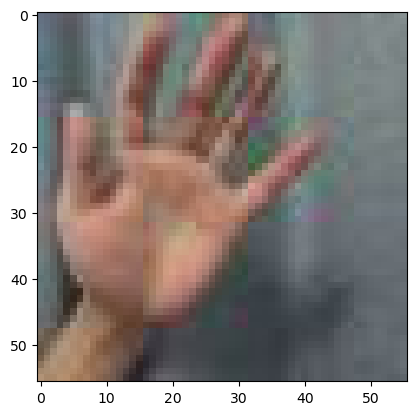

예측확률분포: [2.4309695e-06 9.9978727e-01 2.1041058e-04]
라벨: 0, 예측결과: 1


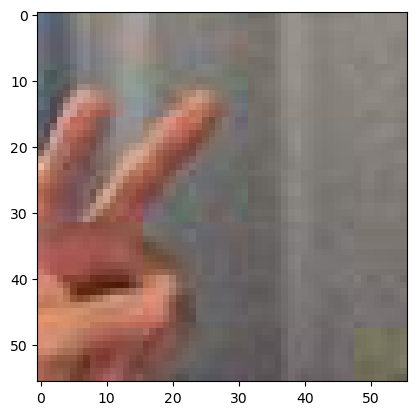

예측확률분포: [0.49134955 0.00120887 0.5074416 ]
라벨: 0, 예측결과: 2


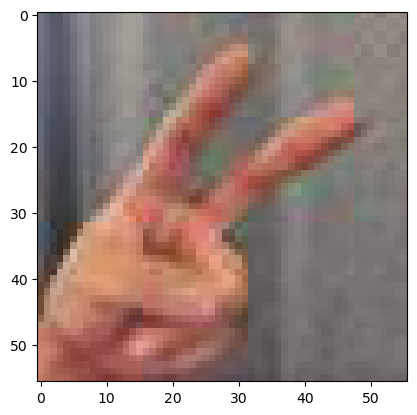

In [20]:
# 추론과 다른 결과 검색
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)


for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()
    
    

# 8. 회고

* 데이타 로드시 설정 정보 확인   
처음에 테스트 데이타 로드시에 (x_test, y_test)=load_data(image_dir_path, 300)에 이미지 숫자를 주지 않아 기본값으로 계산되어 정확도가 
낮게 나와 원인 추적함

* 다양한 데이타 추가는 진리
초기에 Train data 300개에서 30~40% 정확도에서 나오다가 데이타를 추가로 넣을 수록 정확도가 올라감.
역시 Train Data는 다다익선임. 물론 흐릿함 없는 양직의 데이타가 필요함. 

* Layer는 깊이 있게 
채널 2개로 시도하다가 더 이상 진전이 없어서 채널하나를 추가했더니 50% 초반의 정확도 보임.

* Validation set 
Train set과 Test세트만으로  체크하다가 둘 사이에 차이가(Gap)너무 컸다. Train set는 99%인데 test 세트는 50%대 과적합인 발생된 듯 했다.
Validation Set를 추가해서 Train 중에도 정확도를 확인하며 하이퍼 파라미터를 수정해 나감

* 데이타 사이즈 변경
28x28로 계속하다가 안정적인 60대의 정확도 확보를 위해 56x56으로 다시 raw데이타를 resizing 시도   